In [8]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az  #ArviZ: Exploratory analysis of Bayesian models
import matplotlib.pyplot as plt

### 5.1. Spurious association

In [5]:
df_divorce = pd.read_csv('../Data/WaffleDivorce.csv', sep=';')

In [7]:
df_divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [9]:
with pm.Model() as divorce_m:
    
    #priors
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta * df_divorce.MedianAgeMarriage
    
    #likelihood
    likelihood = pm.Normal('divoice', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:16<00:00, 606.69draws/s]


##### notice that az.summary() and pm.summary() are the same

In [12]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,28.162,4.205,19.932,35.789,0.093,0.066,2057.0,2037.0,2063.0,2402.0,1.0
beta,-0.709,0.161,-1.009,-0.401,0.004,0.003,2055.0,2028.0,2061.0,2472.0,1.0
sigma,1.530,0.161,1.247,1.835,0.003,0.002,3045.0,2988.0,3118.0,3280.0,1.0


In [13]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,28.162,4.205,19.932,35.789,0.093,0.066,2057.0,2037.0,2063.0,2402.0,1.0
beta,-0.709,0.161,-1.009,-0.401,0.004,0.003,2055.0,2028.0,2061.0,2472.0,1.0
sigma,1.530,0.161,1.247,1.835,0.003,0.002,3045.0,2988.0,3118.0,3280.0,1.0


##### standardize the predictors

In [41]:
df_divorce = df_divorce.assign(MedianAgeMarriage_stand = lambda x: (df_divorce.MedianAgeMarriage \
                                                     - df_divorce.MedianAgeMarriage.mean())/df_divorce.MedianAgeMarriage.std(),
                              Marriage_stand = lambda x: (df_divorce.Marriage - df_divorce.Marriage.mean())/ \
                              df_divorce.Marriage.std())

In [40]:
df_divorce.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,MedianAgeMarriage_stand,inplace,Marriage_stand
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,-0.606290,True,0.022644
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,-0.686699,True,1.549802
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,-0.204241,True,0.048974
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,-1.410387,True,1.655123
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,0.599857,True,-0.266989


In [22]:
with pm.Model() as divorce_m_std:
    
    #priors
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta * df_divorce.MedianAgeMarriage_stand
    
    #likelihood
    likelihood = pm.Normal('divoice', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:04<00:00, 2461.76draws/s]


In [23]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,9.691,0.215,9.275,10.087,0.002,0.002,9147.0,9121.0,9176.0,6022.0,1.0
beta,-1.035,0.218,-1.432,-0.630,0.002,0.002,7973.0,7973.0,7949.0,5428.0,1.0
sigma,1.518,0.159,1.231,1.816,0.002,0.001,8942.0,8586.0,9313.0,6045.0,1.0


In [24]:
summary = pm.summary(trace)

In [27]:
summary.loc['alpha', 'mean']

9.691

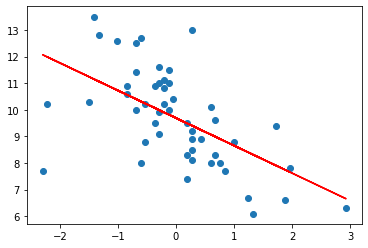

In [29]:
plt.scatter(df_divorce.MedianAgeMarriage_stand, df_divorce.Divorce)
plt.plot(df_divorce.MedianAgeMarriage_stand, summary.loc['alpha', 'mean'] \
         + summary.loc['beta', 'mean'] * df_divorce.MedianAgeMarriage_stand, color='red')

In [31]:
M_min = df_divorce.MedianAgeMarriage_stand.min()
M_max = df_divorce.MedianAgeMarriage_stand.max()

##### code 5.2

In [32]:
MedianAge_input = np.linspace(M_min, M_max, num=100)

In [33]:
posterior = pm.trace_to_dataframe(trace, chains=1) #let's just use the first chain

In [35]:
posterior.shape

2000

In [37]:
mu_pred = np.zeros((len(MedianAge_input), posterior.shape[0]))
for i, w in enumerate(MedianAge_input):
    mu_pred[i] = posterior['alpha'] + posterior['beta'] * w   

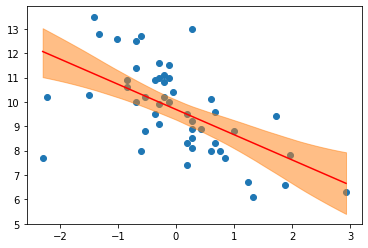

In [38]:
plt.scatter(df_divorce.MedianAgeMarriage_stand, df_divorce.Divorce)
plt.plot(MedianAge_input, summary.loc['alpha', 'mean'] \
         + summary.loc['beta', 'mean'] * MedianAge_input, color='red')
az.plot_hpd(MedianAge_input, mu_pred.T)  #notice that the 2D array mu_pred should be transposed first. 

#### 5.1.1 Multivariate notation

##### code 5.4

In [43]:
with pm.Model() as model_5_4:
    
    # prior
    alpha = pm.Normal('alpha', mu=10, sigma=10)
    beta_R = pm.Normal('beta_R', mu=0, sigma=1)
    beta_A = pm.Normal('beta_A', mu=0, sigma=1)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    mu = alpha + beta_R * df_divorce.Marriage_stand + beta_A * df_divorce.MedianAgeMarriage_stand
    
    #likelihood
    likelihood = pm.Normal('divorce', mu=mu, sigma=sigma, observed=df_divorce.Divorce)
    
    #inference
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_A, beta_R, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:05<00:00, 1962.78draws/s]


In [46]:
pm.summary(trace, credible_interval=0.89)

,mean,sd,hpd_5.5%,hpd_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,9.694,0.215,9.342,10.023,0.003,0.002,6821.0,6804.0,6822.0,5323.0,1.0
beta_R,-0.122,0.293,-0.582,0.350,0.004,0.003,5153.0,4392.0,5156.0,5135.0,1.0
beta_A,-1.125,0.294,-1.563,-0.618,0.004,0.003,4296.0,4222.0,4285.0,4768.0,1.0
sigma,1.517,0.157,1.281,1.772,0.002,0.001,6203.0,6121.0,6247.0,5702.0,1.0


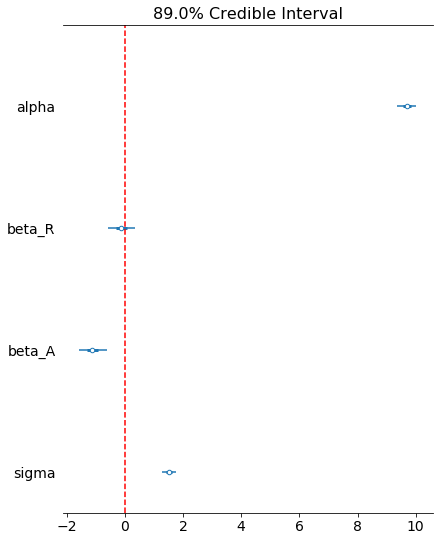

In [55]:
pm.forestplot(trace, combined=True, credible_interval=0.89)
plt.axvline(x=0, linestyle='--', c='red')
plt.show()